GAN 자료 출처:  https://youtu.be/odpjk7_tGY0 / 
https://www.samsungsds.com/global/ko/support/insights/Generative-adversarial-network-AI.html

DCGAN 자료 출처: http://jaejunyoo.blogspot.com/2017/02/deep-convolutional-gan-dcgan-1.html

## Discriminative model, Generative model

- 2014년 NIPS에 발표된 논문, Ian Goodfellow가 제안 
-  분류를 담당하는 모델(판별자 Discirimiator)과 회귀생성을 담당하는 두 개의 모델(생성자 Generator)로 구성
- Generator와 Discirimiator, 두 네트워크를 적대적으로 학습시키는 비지도 학습 기반의 생성모델(Unsupervised Generative model)


<img src = "https://image.slidesharecdn.com/gan-170828035730/95/1-gangenerative-adversarial-network-6-638.jpg?cb=1504578141">

<img src = "https://image.slidesharecdn.com/gan-170828035730/95/1-gangenerative-adversarial-network-7-638.jpg?cb=1504578141">

-	Discriminative model (Supervised model): Input이 들어왔을 때, input에 해당하는 class를 맞추는 것
-	Generative model (Unsupervised model): training data의 분포를 학습


<img src = "https://kjhov195.github.io/post_img/200309/image1.png">

<img src = "https://image.samsungsds.com/global/ko/support/insights/gan4.jpg?queryString=20200911030818">

최종적인 목적은 Training data과 비교하였을 때 구분할 수 없을 정도로 유사한 가짜 데이터를 생성해낼 수 있도록 Training data의 분포 Pdata(x)를 추정하는 가짜 데이터의 분포 Pmodel(x)를 찾는 것

## GAN의 구조

<img src = "https://kjhov195.github.io/post_img/200309/image2.png">

- Discrimator: 진짜 이미지를 가지고 학습, 이미지(고차원 벡터)가 들어오면 진짜 / 가짜인지 구별 (0~1)
- Generator: 가짜 이미지를 가지고 학습, 랜덤한 코드를 받아 가짜 이미지를 생성하여 Discriminator를 속이고자 함 (Discriminator에서 1이 나오도록 학습)

-> 학습을 하면 할수록 진짜 이미지같은 가짜 이미지를 만들게 됨

<img src = "https://image.slidesharecdn.com/gan-170828035730/95/1-gangenerative-adversarial-network-18-638.jpg?cb=1504578141">

<img src = "https://image.slidesharecdn.com/gan-170828035730/95/1-gangenerative-adversarial-network-19-638.jpg?cb=1504578141">

<img src = "https://image.slidesharecdn.com/gan-170828035730/95/1-gangenerative-adversarial-network-20-638.jpg?cb=1504578141">

## GAN의 목적함수

<img src = "https://image.slidesharecdn.com/gan-170828035730/95/1-gangenerative-adversarial-network-21-638.jpg?cb=1504578141">

두 가지 optimization maxDV (D,G)와 minGV (D,G)가 순차적으로 이루어진다.

### - Discriminator

이상적인 D는 진짜 데이터가 input으로 들어왔을 때 1에 가까운 값을 return해야 한다. D(x real)의 값은 1에 가까워야 하며, 바꿔 말하면 logD(x real)의 값이 0에 가까워야 한다.

D(x)의 경우 x가 진짜 데이터일 확률이므로, 0에서 1 사이의 값을 가진다. 즉, logD(x real)의 값은 −∞에서 0사이의 값을 가지므로, logD(x real)의 값이 0에 가깝게 만든다는 것은 logD(x real)의 값을 Maximize시키는 것과 같은 의미임을 알 수 있다.

반면, random vector z가 주어지고,(z∼pz(z)) 이로부터 가짜 데이터 G(z)가 생성되었다고 하자. 

이 가짜 데이터 G(z)를 D의 input으로 준다면, D(G(z))의 값은 0에 가까워야 하며, 이는 곧 1−D(G(z))는 1에 가까워야 한다는 것을 의미한다. 즉, 이상적인 G의 경우 log(1−D(G(z)))가 0에 가까워야 한다.

이는 1−D(G(z))의 값을 Maximize하는 것과 같고, 바꿔말하면 log(1−D(G(z)))를 Maximize하는 것과도 같다.

즉, 위 두가지를 종합하여 진짜를 진짜로, 가짜를 가짜로 잘 구분하는 D를 만들기 위해서는 V(D,G)를 D에 대하여 Maximize해야 한다.

<img src = "https://image.slidesharecdn.com/gan-170828035730/95/1-gangenerative-adversarial-network-22-638.jpg?cb=1504578141">

### - Generator

G의 입장에서는 이 가짜 데이터 G(z)를 D의 input으로 주었을 때, D가 진짜 데이터로 착각할 만큼 진짜같아야 하므로, D(G(z))의 값은 1에 가깝도록 G(z)를 생성해야 한다.

이는 1−D(G(z))의 값을 Minimize하는 것과 같고, 바꿔말하면 log(1−D(G(z)))를 Minimize하는 것과도 같다.

## 코드

In [ ]:
import os
import torch
import torchvision
import torch.nn as nn
from torchvision import transforms
from torchvision.utils import save_image


# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
latent_size = 64
hidden_size = 256
image_size = 784
num_epochs = 200
batch_size = 100
sample_dir = 'samples'

# Create a directory if not exists
if not os.path.exists(sample_dir):
    os.makedirs(sample_dir)

In [ ]:
# Image processing
# transform = transforms.Compose([
#                 transforms.ToTensor(),
#                 transforms.Normalize(mean=(0.5, 0.5, 0.5),   # 3 for RGB channels
#                                      std=(0.5, 0.5, 0.5))])
transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.5],   # 1 for greyscale channels
                                     std=[0.5])])

In [ ]:
# MNIST dataset
mnist = torchvision.datasets.MNIST(root='../../data/',
                                   train=True,
                                   transform=transform,
                                   download=True)

# Data loader
data_loader = torch.utils.data.DataLoader(dataset=mnist,
                                          batch_size=batch_size, 
                                          shuffle=True)

Extracting ../../data/MNIST/raw/train-images-idx3-ubyte.gz to ../../data/MNIST/raw


Extracting ../../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../../data/MNIST/raw



Extracting ../../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../../data/MNIST/raw


Extracting ../../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../../data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
# Discriminator
D = nn.Sequential(
    nn.Linear(image_size, hidden_size),
    nn.LeakyReLU(0.2),
    nn.Linear(hidden_size, hidden_size),
    nn.LeakyReLU(0.2),
    nn.Linear(hidden_size, 1),
    nn.Sigmoid())

MNIST 데이터는 28 x 28

input이 1차원으로 펼친 784가 되어야 함

hidden dimension은 256으로 가정

output dimension은 진짜인지 가짜인지 binary classification을 하는 것이므로 1

sigmoid 함수를 통해 0~1 사이의 값을 뱉음


In [ ]:
# Generator 
G = nn.Sequential(
    nn.Linear(latent_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, image_size),
    nn.Tanh())

입력값은 latent code로 받고, 거기로부터 이미지를 생성

이미지를 다시 discriminator에게 넣어줘야 함

output dimension은 이미지를 만들어야 하기 때문에 784

input 데이터의 범위를 -1 ~ 1로 조정하기 위해 tanh 함수를 거친다.

In [ ]:
# Device setting
D = D.to(device)
G = G.to(device)

# Binary cross entropy loss 
criterion = nn.BCELoss()

<img src = "https://cdn-images-1.medium.com/max/800/1*EJPT0utTkQ2qrHfjDID5RA.png">

loss 함수는 binary crossentropy 함수를 사용

- y = 1이면 - y log (Y pred)만 남게 된다. Y pred를 D라고 생각하면 Discriminator의 목적 함수에서 log D(X)와 같다. 

    gradient descent를 하면서 minimize하면 y log (Y pred)를 maximize하는 것과 같아진다.

- 반면, y = 0이면 왼쪽이 지워지고, - log(1 - Y pred)만 남게 된다. Y pred를 D라고 생각하면 Discriminator의 목적 함수에서 log (1 - D(X))와 같다.


In [ ]:
# Optimizer
d_optimizer = torch.optim.Adam(D.parameters(), lr=0.0002)
g_optimizer = torch.optim.Adam(G.parameters(), lr=0.0002)

def denorm(x):
    out = (x + 1) / 2
    return out.clamp(0, 1)

def reset_grad():
    d_optimizer.zero_grad()
    g_optimizer.zero_grad()

Discriminator와 Generator는 서로 충돌되는 학습을 하기 때문에, optimizer 함수를 따로 구현해야 한다. 

In [ ]:
# Start training
total_step = len(data_loader)
for epoch in range(num_epochs):
    for i, (images, _) in enumerate(data_loader):
        images = images.reshape(batch_size, -1).to(device)
        
        # Create the labels which are later used as input for the BCE loss
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        # ================================================================== #
        #                      Train the discriminator                       #
        # ================================================================== #

        # Compute BCE_Loss using real images where BCE_Loss(x, y): - y * log(D(x)) - (1-y) * log(1 - D(x))
        # Second term of the loss is always zero since real_labels == 1
        outputs = D(images)
        d_loss_real = criterion(outputs, real_labels)
        real_score = outputs
        
        # Compute BCELoss using fake images
        # First term of the loss is always zero since fake_labels == 0
        z = torch.randn(batch_size, latent_size).to(device)
        fake_images = G(z)
        outputs = D(fake_images)
        d_loss_fake = criterion(outputs, fake_labels)
        fake_score = outputs
        
        # Backprop and optimize
        d_loss = d_loss_real + d_loss_fake
        reset_grad()
        d_loss.backward()    # 모든 weight에 대해 gradient 값을 계산
        d_optimizer.step()   # 정의한 optimizer를 가지고 gradient descent (loss를 최소화) 학습
        
        # ================================================================== #
        #                        Train the generator                         #
        # ================================================================== #

        # Compute loss with fake images
        z = torch.randn(batch_size, latent_size).to(device)  # 가짜 이미지
        fake_images = G(z)
        outputs = D(fake_images)
        
        # We train G to maximize log(D(G(z)) instead of minimizing log(1-D(G(z)))
        # For the reason, see the last paragraph of section 3. https://arxiv.org/pdf/1406.2661.pdf
        g_loss = criterion(outputs, real_labels)   # discriminator에 넣었을 때 1에 가까운 값이 나오도록 학습
        
        # Backprop and optimize
        # 이 때 discriminator를 고정시켜야 함
        # discriminator의 weight과 bias는 학습하지 않고, generator 부분에서만 학습
        reset_grad()
        g_loss.backward()
        g_optimizer.step()
    
    
        if (i+1) % 200 == 0:
            print('Epoch [{}/{}], Step [{}/{}], d_loss: {:.4f}, g_loss: {:.4f}, D(x): {:.2f}, D(G(z)): {:.2f}' 
                  .format(epoch, num_epochs, i+1, total_step, d_loss.item(), g_loss.item(), 
                          real_score.mean().item(), fake_score.mean().item()))
    
    # Save real images
    if (epoch+1) == 1:
        images = images.reshape(images.size(0), 1, 28, 28)
        save_image(denorm(images), os.path.join(sample_dir, 'real_images.png'))
    
    # Save sampled images
    fake_images = fake_images.reshape(fake_images.size(0), 1, 28, 28)
    save_image(denorm(fake_images), os.path.join(sample_dir, 'fake_images-{}.png'.format(epoch+1)))


# Save the model checkpoints 
torch.save(G.state_dict(), 'G.ckpt')
torch.save(D.state_dict(), 'D.ckpt')

Epoch [0/200], Step [200/600], d_loss: 0.1946, g_loss: 3.4042, D(x): 0.94, D(G(z)): 0.08
Epoch [0/200], Step [400/600], d_loss: 0.1365, g_loss: 4.5895, D(x): 0.95, D(G(z)): 0.03
Epoch [0/200], Step [600/600], d_loss: 0.1802, g_loss: 4.6540, D(x): 0.93, D(G(z)): 0.03
Epoch [1/200], Step [200/600], d_loss: 0.1319, g_loss: 3.9925, D(x): 0.98, D(G(z)): 0.07
Epoch [1/200], Step [400/600], d_loss: 0.0934, g_loss: 5.8808, D(x): 0.96, D(G(z)): 0.03
Epoch [1/200], Step [600/600], d_loss: 0.0352, g_loss: 5.7423, D(x): 0.99, D(G(z)): 0.02
Epoch [2/200], Step [200/600], d_loss: 0.1545, g_loss: 6.1497, D(x): 0.94, D(G(z)): 0.02
Epoch [2/200], Step [400/600], d_loss: 0.1020, g_loss: 5.8258, D(x): 0.96, D(G(z)): 0.03
Epoch [2/200], Step [600/600], d_loss: 0.0752, g_loss: 5.3569, D(x): 0.98, D(G(z)): 0.02
Epoch [3/200], Step [200/600], d_loss: 0.1473, g_loss: 6.0725, D(x): 0.95, D(G(z)): 0.03
Epoch [3/200], Step [400/600], d_loss: 0.0658, g_loss: 6.1928, D(x): 0.98, D(G(z)): 0.04
Epoch [3/200], Step [

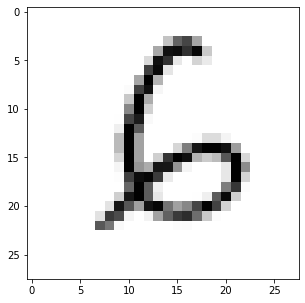

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5, 5))
image = np.reshape(images[0], [28, 28])
plt.imshow(image, cmap='Greys')
plt.show()

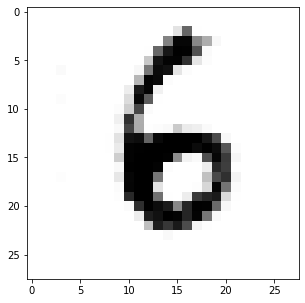

In [ ]:
plt.figure(figsize=(5, 5))
fake_image = fake_images.detach().numpy()
image = fake_image[4].reshape([28, 28])
# image = tensor.detach().numpy.
plt.imshow(image, cmap='Greys')
plt.show()

## Heuristic Objective function of Genarator

<img src = "https://image.slidesharecdn.com/gan-170828035730/95/1-gangenerative-adversarial-network-32-638.jpg?cb=1504578141">

G의 objective function의 경우, 위 식과 같이 minimize시키는 것이다.

하지만 이는 Practical한 입장에서 GAN을 training시킬 때 좋지 않은 방법이다. 

우리는 GAN의 학습 초기에 G의 성능이 좋지 않아, D(G(z))의 값이 0에 가까운 값이 나올 것이라는 것을 예상할 수 있다. 

즉, 초기 학습 과정에서 log(1−x) 함수 상의 x=0 근방에서 gradient를 구하여 weight을 update하게 되는데, 그림에서 볼 수 있듯이 해당 영역에서는 Gradient가 매우 작은 것을 확인할 수 있다. 

즉, 학습이 매우 더디게 이루어진다.



<img src = "https://image.slidesharecdn.com/gan-170828035730/95/1-gangenerative-adversarial-network-33-638.jpg?cb=1504578141">

반면, log(x) 함수의 경우는 다르다. 

log(x) 함수의 경우 x=0 근방에서의 gradient가 매우 커서 학습 초기에 training이 매우 잘 될 것이라는 것을 유추할 수 있다. 

또한, 학습이 진행됨에 따라 G가 가짜 데이터를 잘 만들 수 있도록 학습될 것이고, 이에 따라 D(G(z))의 값이 점점 더 1에 가까워지게 될 것이다. 

log(x) 함수를 보면 x=0 근방에서는 Gradient가 매우 크다가 x=1에 가까워 질수록 Gradient가 점점 줄어든다는 것을 확인할 수 있다.

즉, G의 목적함수를 다음과 같이 log(x)로 나타낸 함수로 바꾸면 초기에는 학습 속도를 높이고, 후기에는 학습 속도를 조절하여 줄일 수 있게 되어 매우 효율적인 학습이 가능하다. 

## DCGAN

- 이름에서 알 수 있듯이 Convolutional 구조를 GAN에 녹여 넣은 것

- Ian Goodfellow가 GAN을 발표한 이후로 많은 분야에 GAN이 연구되었지만 그 때마다 항상 불안정한 구조로 인한 문제가 따라붙었다. 그래서 GAN을 다룬 논문들을 보면 하나같이 이 부분에 대한 어려움을 언급하고, NIPS 2016에서 Tutorial이나 workshop 세션에서도 큰 주제로 다룬 부분이 바로 이 "GAN의 안정화"이다.

- DCGAN은 굉장한 결과를 보여주며 이후에 나오는 대다수의 GAN 구조는 전부 다 어떤 식으로든 DCGAN 구조를 사용했다고 한다.

## DCGAN의 특징

<img src = "https://image.slidesharecdn.com/gan-170828035730/95/1-gangenerative-adversarial-network-38-638.jpg?cb=1504578141">

 - 이미지의 산술적인 연산이 가능해짐
 - word2vec에서 'king' - 'man' + 'woman' = 'queen'이 나왔던 것과 비슷 
 - ‘안경을 쓴 남자’ - ‘안경을 쓰지 않은 남자’ + ‘안경을 쓰지 않은 여자' = ‘안경을 쓴 여자'
 - GAN 생성자의 결과물을 우리가 원하는 데로 마음껏 조작할 수 있다는 가능성을 확인한 것이며, 단순한 데이터의 분류가 아닌 새로운 것을 창조할 능력을 가지게 된 것을 의미

## DCGAN의 구조

<img src = "https://2.bp.blogspot.com/-oMyhHfxOqiE/WKF4KlVYWJI/AAAAAAAABRs/6BDIypy1hn0U8MGRFxfVaXOcQDO7vX1cQCK4B/s1600/dcgan-architecture.PNG">

- 이미지를 generate하기 위해서는 차원을 늘려나가야 하므로, max pooling과 같이 미분이 되지 않는 부분을 convolution으로 대체하여 "all convolutional net" 사용 

In [ ]:
from __future__ import print_function
import argparse
import os
import random

import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
from torch.autograd import Variable

cudnn.benchmark = True

In [ ]:
class Generator(nn.Module):
    def __init__(self, args):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            # input is Z, going into a convolution
            nn.ConvTranspose2d(in_channels = args.nz, out_channels = args.ngf * 8, kernel_size = 4,stride = 1, padding = 0, bias=False),
            nn.BatchNorm2d(args.ngf * 8),
            nn.ReLU(True),
            # state size. (ngf*8) x 4 x 4
            nn.ConvTranspose2d(args.ngf * 8, args.ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(args.ngf * 4),
            nn.ReLU(True),
            # state size. (ngf*4) x 8 x 8
            nn.ConvTranspose2d(args.ngf * 4, args.ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(args.ngf * 2),
            nn.ReLU(True),
            # state size. (ngf*2) x 16 x 16
            nn.ConvTranspose2d(args.ngf * 2, args.ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(args.ngf),
            nn.ReLU(True),
            # state size. (ngf) x 32 x 32
            nn.ConvTranspose2d(args.ngf, args.nc, 4, 2, 1, bias=False),
            nn.Tanh()
            # state size. (nc) x 64 x 64
        )

    def forward(self, input):
          output = self.main(input)
          return output

In [ ]:
class Discriminator(nn.Module):
    def __init__(self, args):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            # input is (nc) x 64 x 64
            nn.Conv2d(in_channels= args.nc, out_channels= args.ndf, kernel_size= 4,stride = 2,padding = 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf) x 32 x 32
            nn.Conv2d(args.ndf, args.ndf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(args.ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*2) x 16 x 16
            nn.Conv2d(args.ndf * 2, args.ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(args.ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*4) x 8 x 8
            nn.Conv2d(args.ndf * 4, args.ndf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(args.ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*8) x 4 x 4
            nn.Conv2d(args.ndf * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
      
        output = self.main(input)
        return output.view(-1, 1).squeeze(1)

In [ ]:
# custom weights initialization called on netG and netD

def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        m.weight.data.normal_(0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        m.weight.data.normal_(1.0, 0.02)
        m.bias.data.fill_(0)

In [ ]:
# hyperparameter

paser = argparse.ArgumentParser()

args = paser.parse_args("")
args.device = 'cuda'
args.n_epochs = 50 # number of epochs of training
args.batch_size = 64 # size of batches
args.lr = 0.0002 # adam learning rate
args.b1 = 0.5 # adam: decay of first order momentum of gradient
args.b2 = 0.999 # adam: decay of first order momentum of gradient
args.nz = 100 # dimensionality of the latent space
args.ngf = 64 # number of generator filters
args.ndf = 64 # number of discriminator filters
args.nc = 3
args.print_every = 50

cudnn.benchmark = True

#set manual seed to a constant get a consistent output
manualSeed = random.randint(1, 10000)
print("Random Seed: ", manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

Random Seed:  7760


In [ ]:
#loading the dataset
dataset = dset.CIFAR10(root="../../data/mnist", download=True,
                           transform=transforms.Compose([
                               transforms.Resize(64),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))

dataloader = torch.utils.data.DataLoader(dataset, batch_size=args.batch_size,
                                         shuffle=True, num_workers=2)

#checking the availability of cuda devices
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# set model
netG = Generator(args).to(device)
netG.apply(weights_init)

netD = Discriminator(args).to(device)
netD.apply(weights_init)

# set loss
criterion = nn.BCELoss()

 # Optimizers
optimizer_G = optim.Adam(netG.parameters(), lr=args.lr, betas=(args.b1, args.b2))
optimizer_D = optim.Adam(netD.parameters(), lr=args.lr, betas=(args.b1, args.b2))

cuda = True if torch.cuda.is_available() else False
Tensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor

Extracting ../../data/mnist/cifar-10-python.tar.gz to ../../data/mnist


In [ ]:
# ----------
#  Training
# ----------

g_loss = []
d_loss = []

for epoch in range(args.n_epochs):
    for i, data in enumerate(dataloader, 0):
        
        real_img = data[0].to(device)
        batch_size = real_img.size(0)

        label = Variable(Tensor(batch_size).fill_(1.0), requires_grad=False)
        fake_label = Variable(Tensor(batch_size).fill_(0.0), requires_grad=False)

        ############################
        # part-1 Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        # train with real
        netD.zero_grad()
        output = netD(real_img)
        errD_real = criterion(output, label) # log(D(x))
        errD_real.backward()
        D_x = output.mean().item()

        # train with fake
        noise = torch.randn(batch_size, args.nz, 1, 1, device=device)
        fake_img = netG(noise)
        output = netD(fake_img.detach())
        errD_fake = criterion(output, fake_label) # log(1 - D(G(z)))
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        errD = errD_real + errD_fake
        optimizer_D.step()

        ############################
        # part-2 Update G network: maximize log(D(G(z)))
        ###########################
        netG.zero_grad()
        output = netD(fake_img)
        errG = criterion(output, label) # log(D(G(z)))
        errG.backward()
        D_G_z2 = output.mean().item()
        optimizer_G.step()
        if i  %  args.print_every == 0:
          print('[%d/%d][%d/%d] Loss_D: %.4f Loss_G: %.4f D(x): %.4f D(G(z)): %.4f / %.4f' % (epoch, args.n_epochs, i, len(dataloader), errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))
        
        #save the output
        if i % 300 == 0:
            print('saving the output')
            vutils.save_image(real_img,'real/real_samples.png',normalize=True)
            fake_img = netG(fixed_noise)
            vutils.save_image(fake_img.detach(),'fake/fake_samples_epoch_%03d.png' % (epoch),normalize=True)

**PyTorch**-GAN] (https://github.com/eriklindernoren/PyTorch-GAN) 에서 다양한 Generative adversarial networks 확인 가능